# Project 3

## introduction

This notebook contains my model for performing the behavioral cloning necessary to let a simulated car drive down an unkown track.

## objective

The objective of the assignment is to gain data by driving down "track 1". This data will be used to train a model in such a way that it can clone the behavior and drive down the track itself. In the end the model should be strong enough to drive down an unkown track as well.

## to do list

- Obtain "good" training data
- Smooth out steering angles in training data, to prevent jitter
- Start by creating the network used by the NVIDIA self-driving car (https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/)
- normalize data
- Augment data
    - tranform images to create a more balanced set
    - add shadows to train the model in less than perfect lighting
- Check performance and start tweeking network and hyper parameters

In [69]:
## Import global packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import csv
import pickle
from tqdm import *
import random

In [31]:
## Global configuration
data_path = './data/1/'
throttle_threshold = 0.2 # Data beneath this threshold will be removed

## Load data

I start with loading the data from the CSV file and plotting it to get a sense of the steering angle.

No. angles = 931
No. images = 931

ANGLE INFORMATION:
Max angle = 0.500
Min angle = -0.592
Mean angle = -0.040

DONE: Loading angles and image locations


(-1, 1)

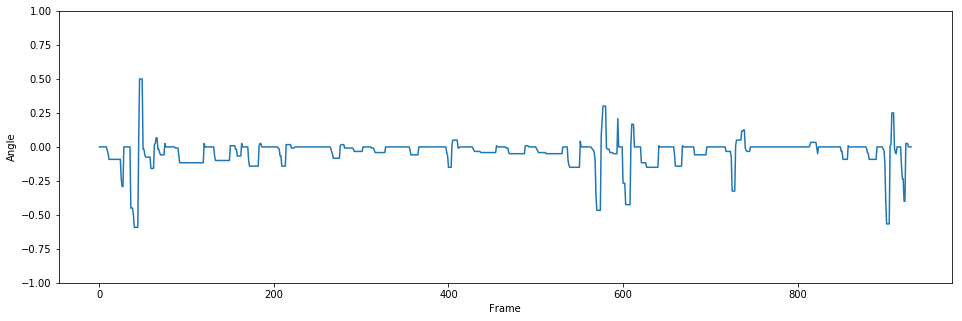

In [32]:
## Load steering angles and images
csv_path = data_path + 'driving_log.csv'
steering_angles = []
images = []

with open(csv_path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if float(row[4]) > throttle_threshold:
            steering_angles.append(row[3])
            images.append(row[0])
    steering_angles = np.array(steering_angles, dtype=np.float32)

print("No. angles = {}".format(len(steering_angles)))
print("No. images = {}".format(len(images)))
print()
print("ANGLE INFORMATION:")
print("Max angle = {:.3f}".format(np.max(steering_angles)))
print("Min angle = {:.3f}".format(np.min(steering_angles)))
print("Mean angle = {:.3f}".format(np.mean(steering_angles)))
print()
print("DONE: Loading angles and image locations")

## Plot angle line to check smoothness
%matplotlib inline

figure = plt.figure(figsize=(16,5))
plt.plot(np.arange(len(steering_angles)), steering_angles)
plt.xlabel("Frame")
plt.ylabel("Angle")
plt.ylim(-1,1)

In [75]:
## Load and normalize the images
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

def normalize_image(image):
    return image/255.-.5

In [76]:
## Check normalization
test_image = load_image(images[0])
print("Before normalization:")
print("MIN: {:.3f}".format(np.min(test_image)))
print("MAX: {:.3f}".format(np.max(test_image)))
print()
normalized_test_image = normalize_image(test_image)
print("After normalization:")
print("MIN: {:.3f}".format(np.min(normalized_test_image)))
print("MAX: {:.3f}".format(np.max(normalized_test_image)))

Before normalization:
MIN: 0.000
MAX: 255.000

After normalization:
MIN: -0.500
MAX: 0.500


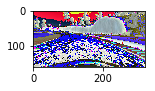

In [97]:
## Plot the normalized test image
figure = plt.figure(figsize=(2,2))
plt.imshow(normalized_test_image)

In [106]:
## Load all images and normalize them
X_train = None
for image in tqdm(images):
    img = load_image(image)
    img = normalize_image(img)
    if X_train is None:
        X_train = np.array([img], dtype=np.float32)
    else:
        X_train = np.append(X_train, [img], axis=0)

print("IMAGES LOADED = {}".format(len(X_train)))

100%|██████████| 931/931 [06:44<00:00,  1.07it/s]

IMAGES LOADED = 931


Shape of train set = (931, 160, 320, 3)


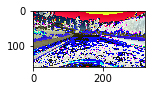

In [107]:
## Plot a random image from the train set
figure = plt.figure(figsize=(2,2))
random_image = random.randint(0, len(X_train))
print("Shape of train set = {}".format(X_train.shape))
plt.imshow(X_train[random_image])

In [108]:
## Save training data to file to avoid re-processing images
training_data = {
    'features': X_train,
    'labels': steering_angles,
}

pickle.dump(training_data, open( "./saved/train.p", "wb" ) )
print("Data saved to train.p file")

Data saved to train.p file


# Logbook

- 24-01:
    - I created some initial data, it's far from perfect but it will help me to set up the base of my network.
    - I created this notebook and started to add code to it.
    - I loaded the csv file and split the data into steering angles and images (with a throttle threshold)
    - I plotted the steering angle to get a grasp of the data
    - I loaded the image files and normalized them
    - I save the data to a train.p file to avoid lengthy reloading